In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()

In [4]:
print("X_train shape is " + str(X_train_orig.shape))
print("Y_train shape is " + str(Y_train_orig.shape))
print("X_test shape is " + str(X_test_orig.shape))
print("Y_test shape is " + str(Y_test_orig.shape))

X_train shape is (60000, 28, 28)
Y_train shape is (60000,)
X_test shape is (10000, 28, 28)
Y_test shape is (10000,)


Text(0.5,0,'Number is 1')

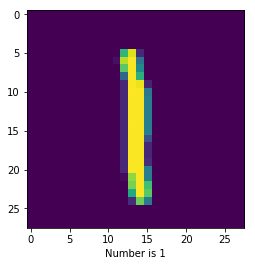

In [6]:
index = random.randint(0,len(X_train_orig[0]))
fig, ax = plt.subplots(figsize=(4,4))
plt.imshow(X_train_orig[index])
plt.xlabel("Number is " + str(Y_train_orig[index]))

In [8]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T

print("X_train_flatten shape = " + str(X_train_flatten.shape))
print("X_test_flatten shape = " + str(X_test_flatten.shape))

X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

X_train_flatten shape = (784, 60000)
X_test_flatten shape = (784, 10000)


In [9]:
def convert_to_onehot_matrix(labels, C):

    C = tf.constant(C,name='C')
    one_hot_matrix = tf.one_hot(labels,depth=C,axis=0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    return one_hot

In [10]:
Y_train = convert_to_onehot_matrix(Y_train_orig,10)
Y_test = convert_to_onehot_matrix(Y_test_orig,10)

In [11]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=(n_x, None), name='X')
    Y = tf.placeholder(tf.float32, shape=(n_y, None), name="Y")
    
    return X, Y

In [12]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", shape = [128,784], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", shape = [128,1], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable("W2", shape = [64,128], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", shape = [64,1], initializer=tf.contrib.layers.xavier_initializer())
    W3 = tf.get_variable("W3", shape = [10,64], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", shape = [10,1], initializer=tf.contrib.layers.xavier_initializer())
    
    parameters = {"W1":W1,
                 "b1":b1,
                 "W2":W2,
                 "b2":b2,
                 "W3":W3,
                 "b3":b3}
    return parameters
    

In [13]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)                     
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)                         
    Z3 = tf.add(tf.matmul(W3,A2),b3)                       

    
    return Z3

In [14]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(784, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


In [15]:
def compute_cost(Z3, Y):
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2
                          (logits=tf.transpose(Z3), labels=tf.transpose(Y)))
    
    return cost


In [16]:
Y_train.shape

(10, 60000)

In [51]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_epochs=2, print_cost=True):
    tf.reset_default_graph() 
    n_x = X_train.shape[0]
    n_y = Y_train.shape[0]
    m = X_train.shape[1]
    costs = []
    
    X,Y = create_placeholders(n_x,n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3,Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    #Intialize all my variables
    init = tf.global_variables_initializer()
    
    #Start my session
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0
            _ , epoch_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y:Y_train})
            costs.append(epoch_cost)
            print("Ephoc %d, cost is %f" %(epoch, epoch_cost))
            
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel("Epochs")
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        classification = sess.run(Y, feed_dict = {X: X_train[0]})
        
    return parameters
    

Ephoc 0, cost is 2.370591
Ephoc 1, cost is 1.909631


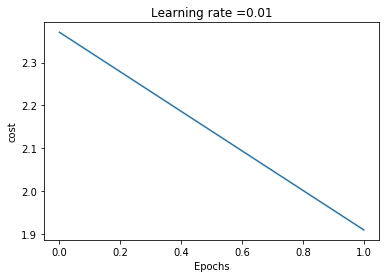

Parameters have been trained!
Train Accuracy: 0.45578334
Test Accuracy: 0.462


ValueError: Cannot feed value of shape (60000,) for Tensor 'X:0', which has shape '(784, ?)'

In [53]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [ ]:
classification = tf.